# Jack Carluccio - QOL Score

## Introduction
My approach to defining the best Pittsburgh neighborhoods through a sub-metric, was defining a quality of life score for each neighborhood. Things that would make it more enjoyable to live in a neighborhood, are good things.


## The Metric
The QOL sub-metric, or quality of life, measures how pleasent living in the given neighborhood would be. This is a combination of population density, sets of steps, and natureness. This was measured from the Neighborhoods with SNAP data from WPRDC.

* Population Density - How densely populated is the neighborhood? High population density is bad
* Sets of Steps - How many sets of steps does the neighborhood contain? High sets of steps is bad
* Natureness - What portion of the land of this neighborhood is nature? High natureness is good

To begin, we need to import pandas, as we'll be using that to perform our data manipulations. Secondly, import matplotlib to create the plots for the data. Finally, import the actual data from the csv file

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('../data/Neighborhoods_with_SNAP_Data.csv')

## Population Density
The dataset contains a field for the number of people per square mile. We will use this metric for the population density of each neighborhood.
Using this data, we create the plot seen below, with the help of matplotlib

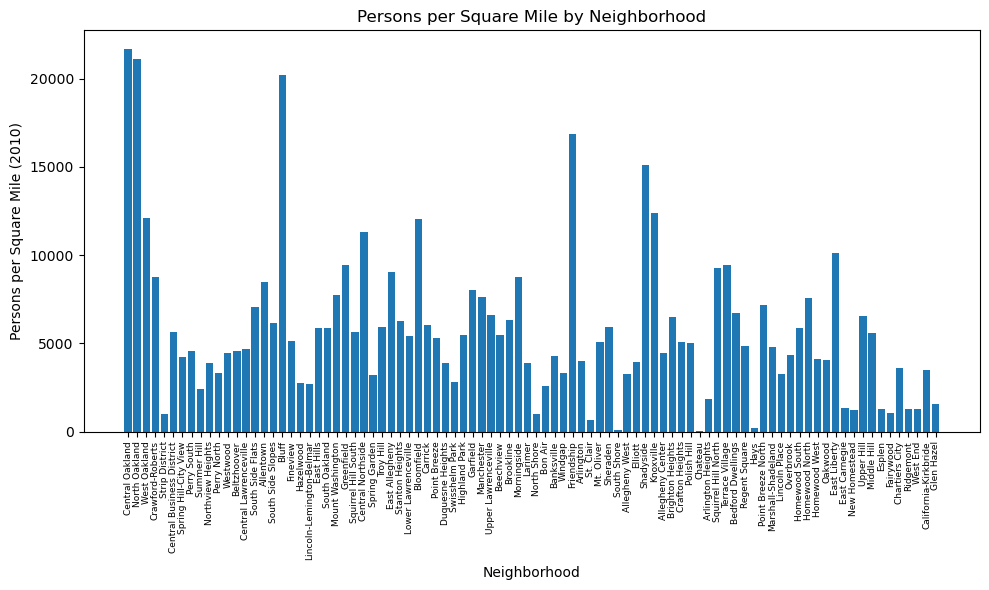

In [5]:
# The population density of the neighborhood
density_data = dataset['Persons___sq__mi__2010_']

# Create a bar chart of the density data
density_figure, density_axis = plt.subplots(figsize=(10, 6))
density_axis.bar(range(len(density_data)), density_data)

plt.xticks(range(len(density_data)), dataset['Neighborhood_2010_HOOD'], rotation = 90, fontsize=6.5)

density_axis.set_title('Persons per Square Mile by Neighborhood')
density_axis.set_xlabel('Neighborhood')
density_axis.set_ylabel('Persons per Square Mile (2010)')

plt.tight_layout()
plt.show()

## Sets of Steps
Funnily enough, the dataset also contains a field for the quantity of sets of steps the neighborhood contains. We can just take these numbers and plot them.

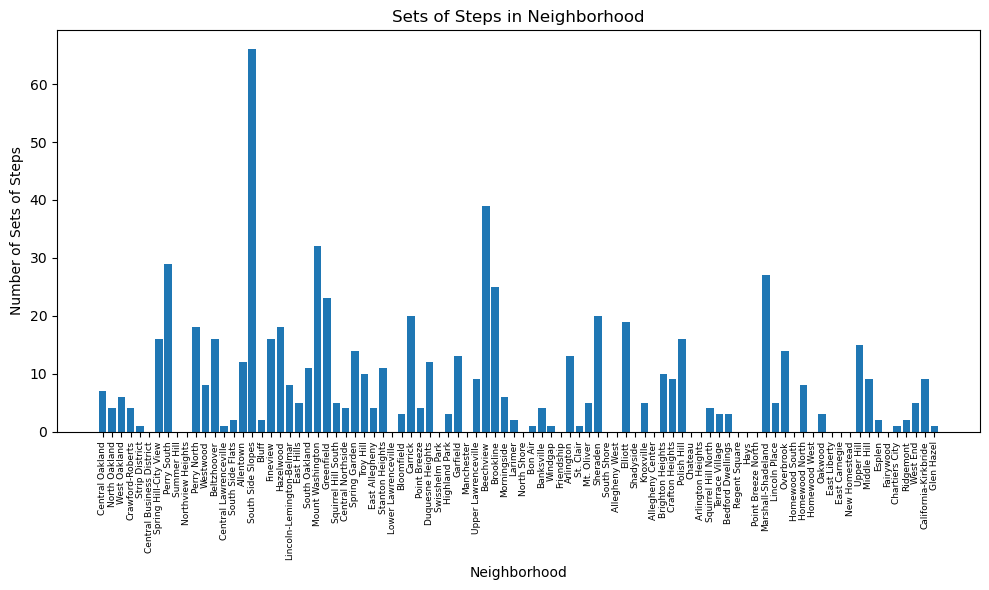

In [7]:
# The number of sets of steps in the neighborhood
steps_data = dataset['SNAP_All_csv___Sets_of_Steps']

# Create a bar chart of the steps data
steps_figure, steps_axis = plt.subplots(figsize=(10, 6))
steps_axis.bar(range(len(steps_data)), steps_data)

plt.xticks(range(len(steps_data)), dataset['Neighborhood_2010_HOOD'], rotation = 90, fontsize=6.5)

steps_axis.set_title('Sets of Steps in Neighborhood')
steps_axis.set_xlabel('Neighborhood')
steps_axis.set_ylabel('Number of Sets of Steps')

plt.tight_layout()
plt.show()

## Natureness
When living in a neighborhood, I do not want it to just be a concrete jungle. Having nature around is pleasent. I define the "natureness" of a neighborhood to be the average of the proportion of land area that is woodland or greenway. The dataset provides these metrics, so a little bit of simple math can provide a "natureness" number for the neighborhood.

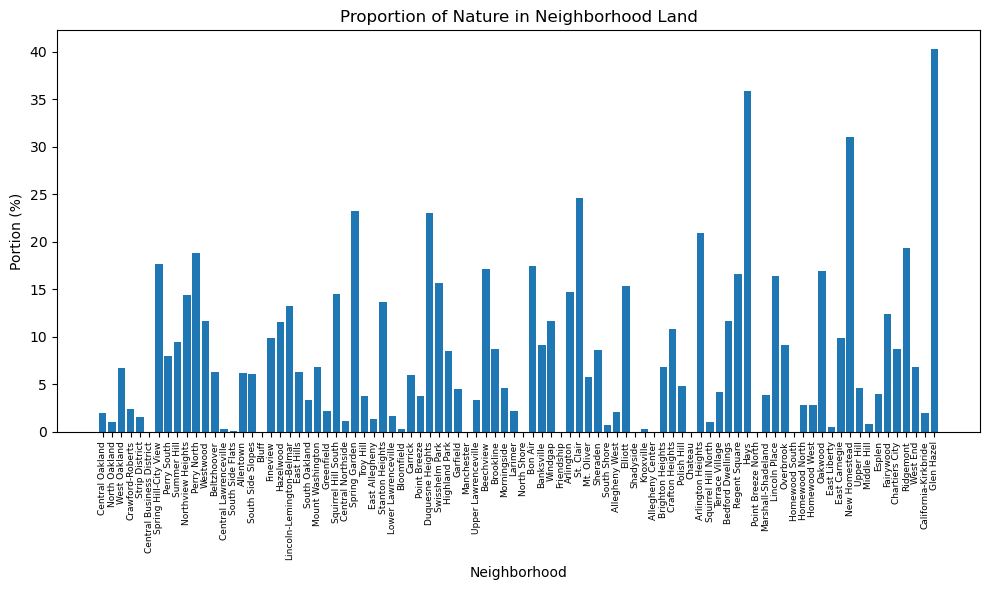

In [9]:
# The proportions of neighborhood area that is greenway and woodland
greenway_portion = dataset['SNAP_All_csv_Greenway____of_lan'].replace('%', '', regex=True).astype(float)
woodland_portion = dataset['SNAP_All_csv_Woodland____of_lan'].replace('%', '', regex=True).astype(float)

# The average "natureness" of the neighborhood. Add 1 to control the influence
nature_portion = (greenway_portion + woodland_portion) / 2

# Create a bar chart of the natureness data
nature_figure, nature_axis = plt.subplots(figsize=(10, 6))
nature_axis.bar(range(len(nature_portion)), nature_portion)

plt.xticks(range(len(nature_portion)), dataset['Neighborhood_2010_HOOD'], rotation = 90, fontsize=6.5)

nature_axis.set_title('Proportion of Nature in Neighborhood Land')
nature_axis.set_xlabel('Neighborhood')
nature_axis.set_ylabel('Portion (%)')

plt.tight_layout()
plt.show()

## Final Score Calculation
We can calculate a final score for each neighborhood, based off 3 sub-scores.

* Density Score: 1 / population density
* Steps Score: 1 / sets of steps
* Nature Score: nature proportion

For each subscore, we add the respective averages, this minimizes the effects of very low or high values.
For example, if a neighborhood had 83 sets of steps, versus one with 1 set, the former would receive a very low score.

Finally, multiply each sub score, to reach the final score, and plot it.

In [10]:
# The averages for the different sub-metrics. This is used to normalize the effects of each sub-metric.
average_density = dataset['Persons___sq__mi__2010_'].mean()
average_steps = dataset['SNAP_All_csv___Sets_of_Steps'].mean()
average_greenway = greenway_portion.mean()
average_woodland = woodland_portion.mean()

# Calculates the sub-score from the population density
def get_density_score(data):
    population_density = data['Persons___sq__mi__2010_']
    # Add the average to control the influence, and invert the score because high density is not preferable
    return 1 / (population_density + average_density)

# Calculates the sub-score from the sets of steps
def get_steps_score(data):
    sets_of_steps = 1 + data['SNAP_All_csv___Sets_of_Steps']
    # Add the average to control the influence, and invert the score because a lot of steps it not preferable
    return 1 / (average_steps + sets_of_steps)

# Calculates the sub-score from the land portion of nature
def get_nature_score(data):
    greenway_portion = float(data['SNAP_All_csv_Greenway____of_lan'].replace('%', ''))
    woodland_portion = float(data['SNAP_All_csv_Woodland____of_lan'].replace('%', ''))
    # Add the average greenway and average woodland to the respective component to control influence, then take the average
    return ( (average_greenway + greenway_portion) + (average_woodland + woodland_portion) ) / 2

# Calculates the overall score for this neighborhood
def calculate_score(neighborhood):
    data = dataset.iloc[neighborhood]
    name = data['Neighborhood_2010_HOOD']

    density_score = get_density_score(data)
    steps_score = get_steps_score(data)
    nature_score = get_nature_score(data)
    
    score = density_score * steps_score * nature_score
    return score * 100_000

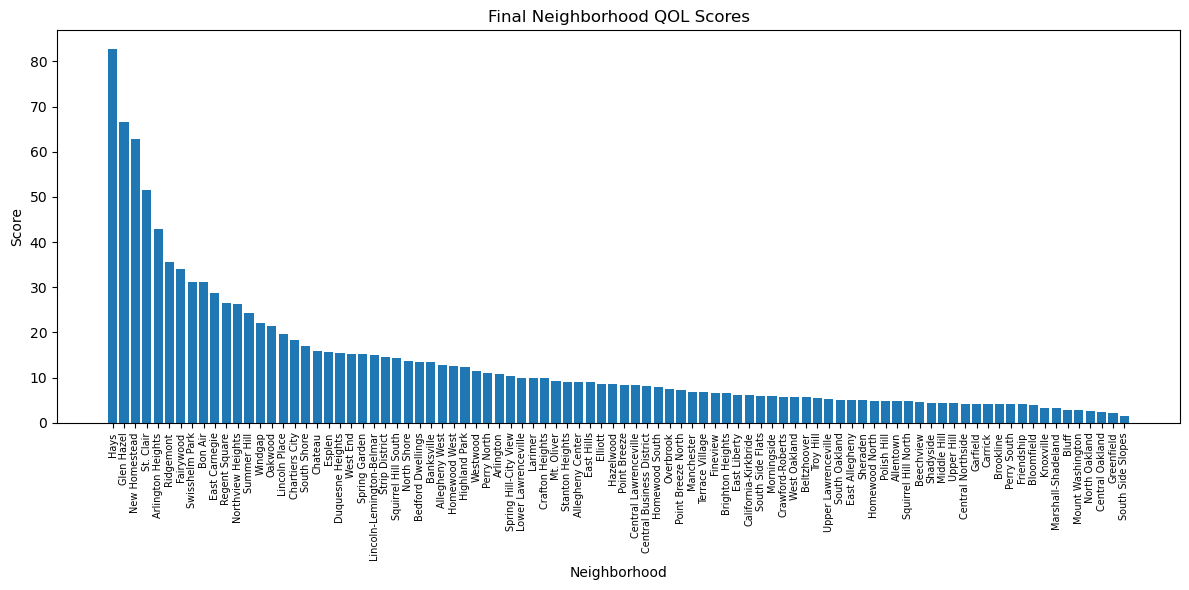

In [12]:
# Calculate scores and map them to neighborhood names in a dictionary
score_dict = {dataset['Neighborhood_2010_HOOD'][i]: calculate_score(i) for i in range(90)}

# Sort the dictionary by scores
sorted_data = sorted(score_dict.items(), key=lambda x: x[1], reverse=True)
sorted_names, sorted_scores = zip(*sorted_data)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(90), sorted_scores)

# Update x-ticks with sorted neighborhood names
plt.xticks(range(90), sorted_names, rotation=90, fontsize=7)

# Make the plot pretty and display it
plt.xlabel('Neighborhood')
plt.ylabel('Score')
plt.title('Final Neighborhood QOL Scores')

plt.tight_layout()
plt.show()

## Best Neighborhood from QOL
As seen in the above plot, the 3 neighborhoods of (Hays, Glen Hazel, and New Homestead) are the best neighborhoods from a QOL standpoint.

## 
